

#Predicting Optimum Number of Clusters in Iris Dataset (Unsupervised ML)

#Minoli Gamlath

In this notebook, I'll be using K-Means clustering to identify clusters in the Iris dataset. 

The Iris dataset describes many iris flowers in terms of 4 features - the length and width of their petals and sepals. 

A cluster is a group of similar data points. A cluster in the Iris dataset would represent a group of flowers whose petal and sepal dimensions are similar in length. A new data point can be sorted into one of the clusters based on its own features.

Identifying these clusters can be useful to spot relationships among data. For instance, identifying clusters of bank customers, based on features such as their loan history and family status, could help banks automatically make decisions about the credit limits that should be granted.

Let's get started.

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

The Iris dataset is very popular, and so is built into the scikit-learn library.
Let's take a look at the data. We will omit the labels, as K-Means clustering uses only the existing features of the data to generate clusters.

In [ ]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**A quick example of K-Means clustering**

Let's take a quick look at how data can be fed to the K-Means algorithm, and what the resulting clusters look like.

The number of clusters *(n)* desired must first be provided to the K-Means algorithm. 

The K-Means algorithm starts by choosing, randomly or otherwise, *n* points from the data. Then, for every remaining point in the dataset, the distances from each of the *n* points are calculated, and the point is assigned to the cluster of the point it is closest to.

The centroids of each cluster are then calculated. The centroid is the point which is represented by the arithmetic mean of all the points in the cluster. There will be *n* centroids.

Using these centroids, the process of calculating point distances, assigning them to clusters, and locating new centroids is repeated over and over until one of three things happen - the centroids stop changing positions, the points stop changing clusters, or a maximum number of iterations is reached. 

For our quick example, we start with 2 clusters.

The init argument simply provides the algorithm with a method of selecting the original points from the dataset.



In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(iris_df)

In [ ]:
kmeans.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

The algorithm has partitioned the dataset into two clusters, the centroids of which are shown immediately above. 

Let's visualize how these clusters look.

In [ ]:
y = kmeans.predict(iris_df)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


The prediction y contains the labels corresponding to each point in the dataset. There are two clusters, so the labels are 0 and 1. 

The data is represented in 4 dimensions (there are 4 features), but on a 2D screen only 2 dimensions can be displayed at a time. So let us choose the columns 0 and 2 (sepal length and petal length).

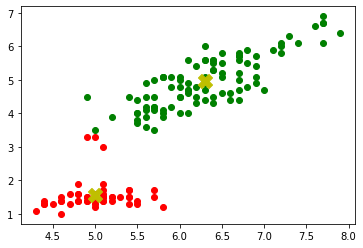

In [ ]:
#This line isolates the data values in the columns 0 and 2, for which the predicted cluster is 0. These points will be shown in red.
plt.scatter(x=iris_df.iloc[y==0,0],y=iris_df.iloc[y==0,2],color='r') 

plt.scatter(x=iris_df.iloc[y==1,0],y=iris_df.iloc[y==1,2],color='g')

centroids = pd.DataFrame(kmeans.cluster_centers_)
#Isolating the centroid values corresponding to the 0th and 2nd columns of data.
plt.scatter(x=centroids.iloc[:,0],y=centroids.iloc[:,2],color='y',marker='X',s=200)

plt.show()

The yellow dots represent the centroids of each cluster.

In [ ]:
kmeans.inertia_

152.34795176035792

Inertia is a measure of how dense a cluster is. The higher the inertia, the less dense the cluster. There is no ideal value of inertia.

# Choosing the optimum number of clusters

When choosing the optimum number of clusters to use to represent a dataset, we observe how the inertia changes with the number of clusters. 

If a uniformly dense cluster (the ideal) was partitioned into smaller clusters, we would expect them too to be uniformly dense, but on a lower scale than the original. In other words, as a uniformly dense cluster is partitioned repeatedly, the inertia falls at a constant rate. 

We don't want to have too many clusters, because that would be redundant and use too much computational power.

Therefore, we look at the graph of inertia versus cluster number, and choose the lowest cluster number beyond which the gradient is roughly a constant. This will be represent the lowest number which yields ideal clusters. This is known as the elbow point.

In [ ]:
inertias = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(iris_df)
  inertias.append(kmeans.inertia_)

print(inertias)

[152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 39.35425513506102, 34.53097186147187, 30.45973366983894, 27.862911312371843]


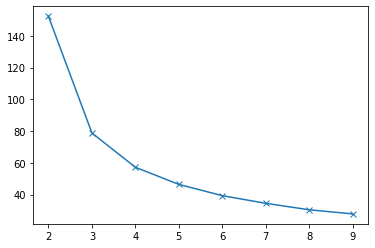

In [ ]:
plt.plot([i for i in range(2,10)],inertias,marker='x')
plt.show()

We can tell from this graph that the elbow point is 3. This means that 3 clusters is an optimum number. Let's visualize these 3 clusters.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_df)
y = kmeans.predict(iris_df)
centroids = pd.DataFrame(kmeans.cluster_centers_)

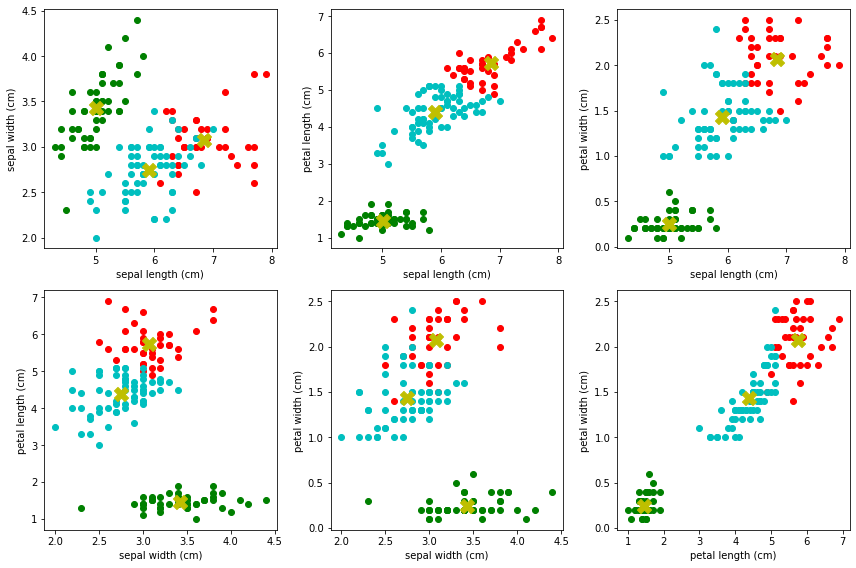

In [ ]:
fig,subplots = plt.subplots(2,3,figsize=(12,8))
colors = ['r','g','c']
features = iris_df.columns

def plot_clusters(i,j,c1,c2):
  for cluster in range(3):
      subplots[i][j].scatter(x=iris_df.iloc[y==cluster,c1],y=iris_df.iloc[y==cluster,c2],color=colors[cluster])
      subplots[i][j].set(xlabel = features[c1], ylabel = features[c2])

  subplots[i][j].scatter(ct.iloc[:,c1],ct.iloc[:,c2],color='y',marker='X',s=200)


plot_clusters(0,0,0,1)
plot_clusters(0,1,0,2)
plot_clusters(0,2,0,3)
plot_clusters(1,0,1,2)
plot_clusters(1,1,1,3)
plot_clusters(1,2,2,3)

      
fig.tight_layout()
fig.show()

You can see from this figure that in every combination of columns, the points are neatly partitioned into three clusters based on their location. 

A few points may overlap in some plots, but that is because in other plots they may be closer to the centroid of their cluster. 